# Unit 6: Regression and Classification
---------------------------------------



## 6.1. Regression

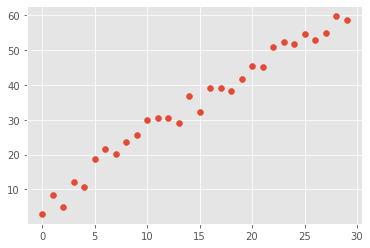

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

n = 30

# x values
x = np.arange(0, n, 1)

# y=2x+5 + random noise
y = 2*x + 5 + 10*(np.random.random(n)-0.5)

fig, ax = plt.subplots()
ax.scatter(x, y)


### 6.1.2. Linear least-squares regression

A simple and common approach to regression analysis is to find a linear function that approximates the data based on the available input variables. The equation of a line is $\hat{y}=mx+b$, where we use $\hat{y}$ to indicate that it is the predicted value of $y$. We can find the values of $m$ and $b$ that minimizes the error. We'll call the coefficients the *weights* and represent these as a vector, $w$. Using this notation, the equation of the line becomes:

$$\hat{y}=w_0x^0+w_1x^1$$

where $w_0$ is the y-intercept and $w_1$ is the slope. For our regression, we have many experimental observations, which make up the rows in the matrix, $X$, below:

$$\begin{bmatrix}
| \\
\hat{y} \\
|
\end{bmatrix} = 
\begin{bmatrix}
| & | \\
1 & x \\
| & | 
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}$$

When we multiply each row of $X$ by the weight vector, $w$, we get an estimate of $\hat{y}$. Now, we need to pick the best $w$ to minimize the error. For least-squares regression, we define a *cost function* based on the Euclidian norm (2-norm) squared. The Euclidian norm of a column vector $v$ is $\left( v^T v \right)^{0.5}$. Note that this is the geometric distance. 

$$\epsilon=\| y-\hat{y} \|_2^2= \| y-Xw \|_2^2$$

We want to find the optimum values for $w$ which minimize this error function. 

$$\min_w \| y-Xw \|_2^2$$

From calculus we know that, the global minimum of a convex function will occur where the derivative is equal to 0. 

$$\min_{w} \| y-Xw \|_2^2 = 0$$
$$\nabla_w \| y-Xw \|_2^2 = 0$$

$$\nabla_w \left[\left( y-Xw \right)^T \left(y-Xw \right) \right] = 0$$
$$\nabla_w \left[y^Ty - y^TXw - w^TX^Ty + w^TX^TXw \right] = 0$$
$$-X^Ty -X^Ty + 2X^TXw = 0$$
$$X^TXw = X^Ty$$
$$w=(X^TX)^{-1}X^Ty$$

There you have it! The weights for a least-squares regression are simply the result of this matrix equation. Now, we will apply this formula to calculate the values for $w$ that minimize the squared error.

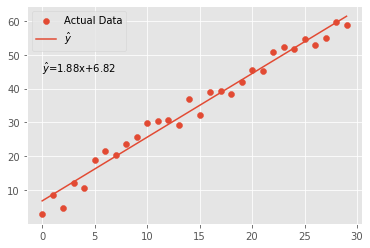

In [47]:
# create a matrix with ones in the first column, and our x values in the second column
X = np.vstack((np.ones(n), x)).T

# reshape the y values into a column vector
y_col = y.reshape((n, 1))

# compute the weights using the equation derived above
# the np.linalg.inv function computes the matrix inverse
w = np.linalg.inv(X.T@X)@X.T@y_col
y_hat = X@w

# plot the actual data and regression line
fig, ax = plt.subplots()
ax.scatter(x, y, label='Actual Data')
ax.plot(x, y_hat, label='$\hat{y}$')

# add the equation and legend
ax.text(0, 45, f'$\hat{{y}}$={w[1, 0]:0.2f}x+{w[0, 0]:0.2f}')
ax.legend()


Notice that the resulting values for the slope and intercept are close to what we used to generate the data. To visualize what we have done, let's plot out the error as a function of $w$. We see in the following plot that the error forms a parabolic bowl. 

Text(0.1, -19, 'Contours show increasing error in $\\hat{y}$')

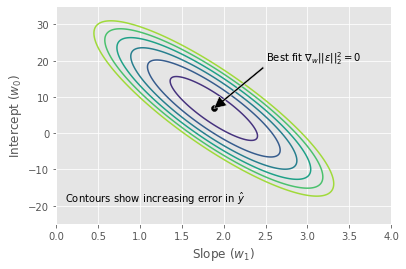

In [48]:
# number of values that we will use to map out the slope, intercept
n_weightvals = 500

# array of possible slope values
w1_arr = np.linspace(0, 4, n_weightvals)

# array of possible y-intercept values
w0_arr = np.linspace(-25, 35, n_weightvals)

# meshgrid allows for 3d plotting
# this forms two 2d matrices
w1_mat, w0_mat = np.meshgrid(m, b)
error = np.zeros(w1_mat.shape)

for i in range(n_weightvals):
    for j in range(n_weightvals):
        e = (y - (w1_mat[i, j]*x + w0_mat[i, j])).reshape((n, 1))
        error[i, j] = e.T@e

fig, ax = plt.subplots()

# plot contour lines for the error function, clipped to a max of 5000
ax.contour(w1_mat, w0_mat, np.clip(error, 0, 5000))

ax.set_xlabel('Slope ($w_1$)')
ax.set_ylabel('Intercept ($w_0$)')

# plot the point calculated by our regression formula
ax.scatter(w[1], w[0], c='black')
ax.annotate(r'Best fit $\nabla_w \||\epsilon\||_2^2=0$', xy=w[::-1], xytext=[2.5, 20],  
            arrowprops={'facecolor': 'black', 'width': 2})

ax.text(0.1, -19, 'Contours show increasing error in $\hat{y}$')

### 6.1.3. Leveraging the [`scikit-learn`](https://scikit-learn.org/stable/index.html) package

As we have seen in previous units, there are often Python packages available to make our life easier. The `scikit-learn` package includes many useful models for regression and classification. For a simple linear model like this, the time savings is minor. But, as you get to more complicated models, it is much easier to use the pre-built models versus building your own.

We will import individual modules from the `sklearn` library. For this example, we'll use the `LinearRegression` module. We first need to create a `LinearRegression` object. By default, the model will try to calculate an intercept term. However, we've already included that term in our $X$ matrix, so we set `fit_intercept=False`.

There is a function of the regression model called `fit` that will calculate the weight vector, just as we have previously. Once the model has been fitted, we can use the `predict` function to apply the weights and generate a vector of $\hat{y}$ values.

If you want to print out, or make any additional calculations using the weight vector, this is available as the property `coef_`.

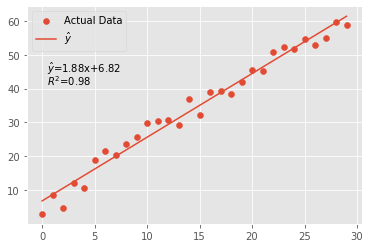

In [49]:
from sklearn.linear_model import LinearRegression

# create the LinearRegression object from scikit-learn
# we set fit_intercept=False because we already have an intercept term in the X matrix
reg = LinearRegression(fit_intercept=False)

# execute the regression operation
reg.fit(X, y)
y_hat = reg.predict(X)

# plot the actual data and regression line
fig, ax = plt.subplots()
ax.scatter(x, y, label='Actual Data')
ax.plot(x, y_hat, label='$\hat{y}$')

# add the equation and legend
# these are stored in an array labeled .coef_ in the regression object
ax.text(0.5, 45, f'$\hat{{y}}$={reg.coef_[1]:0.2f}x+{reg.coef_[0]:0.2f}')
ax.text(0.5, 41, f'$R^2$={reg.score(X, y):0.2f}')
ax.legend()

### 6.1.4. Multi-variate linear regression

More generally, we can develop a linear regression with any number, $n$, of input variables. There is actually no change to the formula that we derived above. 

$$\hat{y_i}=w_0x_{i0}+w_1x_{i1}+...+w_nx_{in}$$

$$\begin{bmatrix}
| \\
\hat{y} \\
|
\end{bmatrix} = 
\begin{bmatrix}
| & | & | & | \\
x_0 & x_1 & ... & x_n \\
| & | & | & |
\end{bmatrix}
\begin{bmatrix}
| \\
w \\
|
\end{bmatrix}$$

Even though this is a *linear* regression, we can include polynomial terms. To do this, create additional columns in the $X$ matrix. 

We could generate this matrix directly using `numpy`, but `scikit-learn` has a module available to generate polynomial expansions of a feature. In the example below, we have a dataset that appears to follow a parabolic shape, so we add a squared term to the regression. Create a `PolynomialFeatures` object. The parameter that you pass should be the maximum order of the polynomial (in this case, 2). Then, run the `fit_transform(x)` function to generate a matrix that has (in this case) $\begin{bmatrix} x^0 &  x^1 & x^2 \end{bmatrix}$ as the columns.

The first 10 rows are printed out so that you can see the matrix that was generated.

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

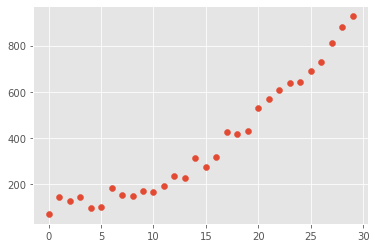

In [60]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(0, n, 1)
y = x**2 + 100 + 100*(np.random.random(n)-0.5)

fig, ax = plt.subplots()
ax.scatter(x, y)


poly = PolynomialFeatures(2)
X = poly.fit_transform(x.reshape((n, 1)))
X[:10, :]

One we have the feature matrix, $X$, the linear regression is identical to what was done previously.

Text(0.5, 720, '$R^2$=0.988')

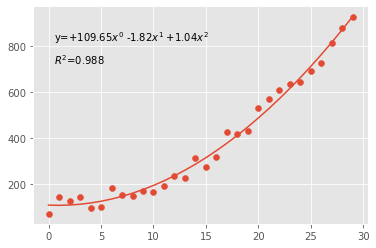

In [61]:
# sklearn LinearRegression object
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)

# plot the raw data and regression fit
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg.predict(X))

# display the equation on the axis
equation_text = ' '.join([f'{a:+0.2f}$x^{{{i}}}$' for i, a in enumerate(reg.coef_)])
ax.text(0.5, 820, f'y={equation_text}')
ax.text(0.5, 720, f'$R^2$={reg.score(X, y):0.3f}')

You can go too far with adding polynomial terms. As the number of terms increases, the $R^2$ will continue to improve. However, we risk *overfitting* the data. This means that we may be fitting noise in the data, which will increase error when we compare to data that is not part of the training set.

Text(0.5, 720, '$R^2$=0.992')

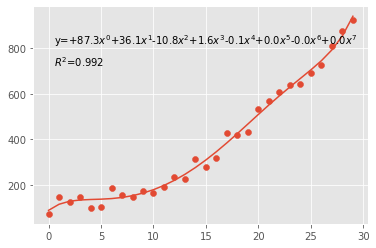

In [68]:
# create polynomial features up to a power of 7
poly = PolynomialFeatures(7)
X = poly.fit_transform(x.reshape((n, 1)))

# complete the linear regression
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)

# plot the raw data and regression fit
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, reg.predict(X))

# display the equation on the axis
equation_text = ''.join([f'{a:+0.1f}$x^{{{i}}}$' for i, a in enumerate(reg.coef_)])
ax.text(0.5, 820, f'y={equation_text}')
ax.text(0.5, 720, f'$R^2$={reg.score(X, y):0.3f}')

### 6.1.5. Other regression techniques

## 6.2. Classification



--------------
## Next Steps:

1. Complete the [Unit 6 Problems](./unit06-solutions.ipynb) to test your understanding
2. Advance to [Unit 7](../07-advanced-plotting/unit07-lesson.ipynb) when you're ready for the next step